### TF RNN stock price

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\SEO09\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### 다른 경로(crypto_trading)에서 가져오고 싶은데...가코드임

In [2]:
os.chdir('C:\\Users\\SEO09\\python\\practice\\crypto_trading')

In [3]:
with open('data_csv/data_ADA_KRW.csv') as f:
    a = pd.read_csv(f).drop(['Unnamed: 0'], axis = 1)

In [4]:
b = a.drop(['timestamp','time','volumefrom'], axis = 1)

In [5]:
os.chdir('C:\\Users\\SEO09\\python\\practice\\machine_learning')

#### 데이터 가져왔으니 돌려볼까?

In [6]:
seq_length = 24
data_dim = 4
output_dim = 1 # 예상 가격을 출력
hidden_dim = 20

In [7]:
xy = np.array(b)*np.array([10000, 10000, 10000, 10000, 10e-3])
x = xy[:,1:]
y = xy[:,[0]]

In [8]:
dataX = []
dataY = []
for i in range(len(y) - seq_length):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length]
    dataX.append(_x) # data with previous data
    dataY.append(_y) # label

In [15]:
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size

trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataX)])

In [16]:
trainY

array([[5.915],
       [6.176],
       [6.168],
       ...,
       [4.062],
       [4.081],
       [4.051]])

In [10]:
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None,1])

In [11]:
cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_dim, state_is_tuple = True)
output, state = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)
Y_pred = tf.contrib.layers.fully_connected(output[:,-1], output_dim, activation_fn = None)

In [12]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))

opt = tf.train.AdamOptimizer(0.01)
train = opt.minimize(loss)

In [13]:
print('start learning')
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('initialized')

start learning
initialized


In [14]:
for i in range(2000):
    tr, l = sess.run([train, loss], feed_dict = {X: trainX, Y: trainY})
    if i%100 == 0:
        print('cycle {} of 2000 done \r'.format(i))

cycle 0 of 2000 done 
cycle 100 of 2000 done 
cycle 200 of 2000 done 
cycle 300 of 2000 done 
cycle 400 of 2000 done 
cycle 500 of 2000 done 
cycle 600 of 2000 done 
cycle 700 of 2000 done 
cycle 800 of 2000 done 
cycle 900 of 2000 done 
cycle 1000 of 2000 done 
cycle 1100 of 2000 done 
cycle 1200 of 2000 done 
cycle 1300 of 2000 done 
cycle 1400 of 2000 done 
cycle 1500 of 2000 done 
cycle 1600 of 2000 done 
cycle 1700 of 2000 done 
cycle 1800 of 2000 done 
cycle 1900 of 2000 done 


In [15]:
testPred = sess.run(Y_pred, feed_dict = {X: testX})

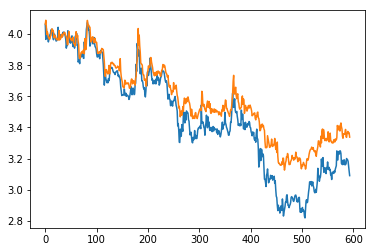

In [16]:
plt.plot(testY)
plt.plot(testPred)
plt.show()

In [43]:
os.chdir('C:\\Users\\SEO09\\python\\practice\\crypto_trading')

with open('data_csv/data_LTC_KRW.csv') as f:
    aa = pd.read_csv(f).drop(['Unnamed: 0'], axis = 1)
    
bb = aa.drop(['timestamp','time','volumefrom'], axis = 1)

os.chdir('C:\\Users\\SEO09\\python\\practice\\machine_learning')

xy3 = np.array(bb)*np.array([10,10,10,10,10e-3])
x3 = xy3[:,1:]
y3 = xy3[:,[0]]

dataX3 = []
dataY3 = []
for i in range(len(y) - seq_length):
    _x = x3[i:i+seq_length]
    _y = y3[i+seq_length]
    dataX3.append(_x) # data with previous data
    dataY3.append(_y) # label
    
testX3 = np.array(dataX3)
testY3 = np.array(dataY3)

testPred3 = sess.run(Y_pred, feed_dict = {X: testX3})

plt.close()

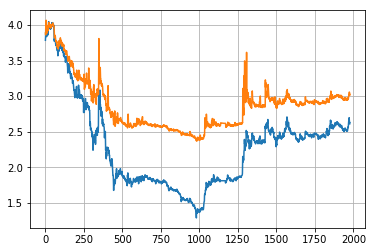

In [47]:
plt.plot(testY3)
plt.plot(testPred3)
plt.grid(True)
plt.show()

#### ADA로 학습한 결과가 LTC에 대해서도 들어맞음을 보임

In [ ]:
class Coin:
    def __init__(self, coin):
        
        self.coin = coin
        
        import os
        os.chdir('C:\\Users\\SEO09\\python\\practice\\crypto_trading')
        with open('data_csv/data_{}_KRW.csv'.format(self.coin)) as f:
            a = pd.read_csv(f).drop(['Unnamed: 0'], axis = 1)
        b = a.drop(['timestamp','time','volumefrom'], axis = 1)
        os.chdir('C:\\Users\\SEO09\\python\\practice\\machine_learning')
        
        self.table = b
    
    def process(self):
        import numpy as np
        xy = np.array(self.table)
        